In [114]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [115]:
data = pd.read_csv("data.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [116]:
one_hot_street = pd.get_dummies(data['street'], drop_first=True)
one_hot_city = pd.get_dummies(data['city'], drop_first=True)
one_hot_statezip = pd.get_dummies(data['statezip'], drop_first=True)
# one_hot_country = pd.get_dummies(data['country'])
data.drop(['country'],1,inplace=True)
# print(one_hot_country.head())

# By default, the get_dummies() does not do dummy encoding, but one-hot encoding.
# To produce an actual dummy encoding from your data, use drop_first=True (not that 'australia' is missing from the columns)

In [117]:
data.drop(['date'],1,inplace=True)
data.drop(['street'],1,inplace=True)
data.drop(['city'],1,inplace=True)
data.drop(['statezip'],1,inplace=True)

In [39]:
# categorical_features = data.select_dtypes(include=[object])
# categorical_features.head()

In [64]:
# from sklearn.preprocessing import LabelEncoder

In [69]:
# # labelEncoder used to convert categorical data or text data into numerical to apply any ML algorithm
# le = LabelEncoder()

# # After importing labelEncoder than fit and transform the text data columns
# categorical_features_en = categorical_features.apply(le.fit_transform)

# # use df.apply() to apply le.fit_transform to all columns
# categorical_features_en.head()

In [70]:
# from sklearn.preprocessing import OneHotEncoder

In [71]:
# done after label encoding
# ohe = OneHotEncoder()

# categorical_features_ohe = ohe.fit_transform(categorical_features_en).toarray()
# categorical_features_ohe

In [72]:
# categorical_features_ohe.shape

In [73]:
# print(categorical_features_en.columns)
# print('*'*100)
# print(type(categorical_features_en))

In [74]:
# print(type(categorical_features_ohe))

In [118]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [119]:
data = data.join([one_hot_street,one_hot_city,one_hot_statezip])
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above',
       ...
       'WA 98155', 'WA 98166', 'WA 98168', 'WA 98177', 'WA 98178', 'WA 98188',
       'WA 98198', 'WA 98199', 'WA 98288', 'WA 98354'],
      dtype='object', length=4656)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 4656 entries, price to WA 98354
dtypes: float64(4), int64(9), uint8(4643)
memory usage: 20.8 MB


In [58]:
# data["S_Rank"] = data['street'].rank() 
# data['city_rank'] = data['city'].rank()
# data['statezip_rank'] = data['statezip'].rank()


In [121]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,WA 98155,WA 98166,WA 98168,WA 98177,WA 98178,WA 98188,WA 98198,WA 98199,WA 98288,WA 98354
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0


In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
# corr = corr = data.corr()
# plt.figure(figsize=(15,8))
# heatmap = sns.heatmap(corr, annot=True)

In [102]:
# data.drop(['date','country'],1,inplace=True)
# data.drop(['street'],1,inplace=True)
# data.drop(['city'],1,inplace=True)

In [123]:
X = data.drop(['price'],1)
y = data.price

In [124]:
from sklearn.model_selection import train_test_split as tts

In [125]:
X_train, X_test, y_train, y_test = tts(X, y, random_state=2, test_size = 0.2)

In [126]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [127]:
train_data = model.fit(X_train,y_train)
train_data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [128]:
accuracy = model.score(X_test, y_test)
accuracy

-4.211070724853715

In [135]:
y_pred = model.predict(X_test)
y_pred

array([ 8.12201876e+04, -4.51078380e+05,  1.03365248e+06, -1.81173943e+04,
       -2.64184610e+05, -1.04207685e+05,  5.68324086e+05,  1.26863326e+05,
        8.64314626e+05, -3.65377438e+05, -3.45903406e+06, -1.87072704e+05,
        3.56318262e+05,  8.03778096e+05,  1.45511540e+05,  4.98791545e+05,
        7.54395262e+05,  7.67547228e+05,  6.16708612e+05,  9.17233483e+04,
        3.60903892e+05, -4.05936029e+05,  5.67355203e+05,  5.06932134e+04,
       -1.78374789e+05,  1.06333464e+06,  5.51218218e+04,  5.03640267e+05,
       -6.16071715e+05,  3.27116297e+05,  2.19159833e+05,  4.40142215e+05,
        3.89178199e+05,  5.70843554e+05, -9.31610268e+04, -2.07525836e+05,
        6.77137671e+06,  9.16033641e+05,  9.52978434e+05,  1.60647773e+06,
       -1.25245581e+06, -1.43104886e+06,  3.13814522e+05,  7.32721299e+05,
        3.61958493e+05,  1.18294173e+06, -4.52092947e+06, -3.23665646e+05,
        8.09830959e+05, -2.65502392e+05,  3.97609805e+05,  1.71450932e+06,
        1.13360192e+06,  

In [130]:
model.intercept_

-702574.2289600368

In [131]:
model.coef_

array([ 5.14545179e+04, -2.37730456e+05,  1.77659290e+02, ...,
        6.14437300e+05, -3.96174018e+05,  2.95007745e+05])

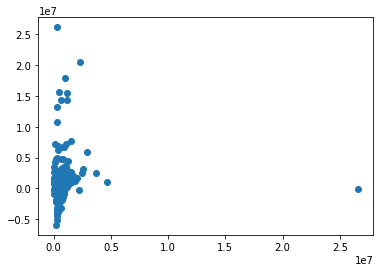

In [136]:
plt.scatter(y_test,y_pred)